In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

SMCS_df = pd.read_csv('Shopping Mall Customer Segmentation Data .csv')
display(SMCS_df)


In [ ]:
#Since this is 2 years ago, Gen Z 18-25, Millenials 26-41, Gen X 42-57, Baby Boomers 58-76, The Silent Generation 77-94
genZ_segment = SMCS_df.loc[(SMCS_df["Age"] >= 18) & (SMCS_df["Age"] <= 25)]
millenial_segment = SMCS_df.loc[(SMCS_df["Age"] >= 26) & (SMCS_df["Age"] <= 41)]
genX_segment = SMCS_df.loc[(SMCS_df["Age"] >= 42) & (SMCS_df["Age"] <= 57)]
bboom_segment = SMCS_df.loc[(SMCS_df["Age"] >= 58) & (SMCS_df["Age"] <= 76)]
silent_segment = SMCS_df.loc[(SMCS_df["Age"] >= 77) & (SMCS_df["Age"] <= 94)]

In [ ]:
#finding the averages
generation_average_spending_scores = {
    'Gen Z': genZ_segment["Spending Score"].mean(),
    'Millenial': millenial_segment["Spending Score"].mean(),
    'Gen X': genX_segment["Spending Score"].mean(),
    'Baby Boomers': bboom_segment["Spending Score"].mean(),
    'Silent Generation': silent_segment["Spending Score"].mean()
}

#bar graph
plt.figure(figsize=(10, 9))
generation_average_spending_scores_barplot = sns.barplot(x=list(generation_average_spending_scores.keys()),y=list(generation_average_spending_scores.values()))

#annotating numbers
for i in range(len(generation_average_spending_scores)):
    generation_average_spending_scores_barplot.text(i,list(generation_average_spending_scores.values())[i] + 1,
    f'{list(generation_average_spending_scores.values())[i]:.1f}',
    ha='center',va='bottom', fontsize= 12)

plt.xlabel('Age Segments')
plt.ylabel('Average Spending Score (1-100)')
plt.title('Average Spending Score by Age Segments')
plt.show()


In [ ]:
#What percentage does each group make up of the market?
generation_segmentation = {
    'Gen Z': len(genZ_segment),
    'Millenial': len(millenial_segment),
    'Gen X': len(genX_segment),
    'Baby Boomers': len(bboom_segment),
    'Silent Generation': len(silent_segment)
}

#Pie Chart
plt.figure(figsize=(10,6))
plt.pie(generation_segmentation.values(),labels=generation_segmentation.keys(),autopct='%1.1f%%')
plt.title('Customer Distribution by Age Segments')
plt.show

In [ ]:
#Segmentation of generation, split again by gender
genZ_segment_male = genZ_segment.loc[genZ_segment["Gender"] == "Male"]
genZ_segment_female = genZ_segment.loc[genZ_segment["Gender"] == "Female"]
millenial_segment_male = millenial_segment.loc[millenial_segment["Gender"] == "Male"]
millenial_segment_female = millenial_segment.loc[millenial_segment["Gender"] == "Female"]
genX_segment_male = genX_segment.loc[genX_segment["Gender"] == "Male"]
genX_segment_female = genX_segment.loc[genX_segment["Gender"] == "Female"]
bboom_segment_male = bboom_segment.loc[bboom_segment["Gender"] == "Male"]
bboom_segment_female = bboom_segment.loc[bboom_segment["Gender"] == "Female"]
silent_segment_male = silent_segment.loc[silent_segment["Gender"] == "Male"]
silent_segment_female = silent_segment.loc[silent_segment["Gender"] == "Female"]


In [ ]:
generation_gender_segmentation = {
    'Gen Z, Male': len(genZ_segment_male),
    'Millenial, Male': len(millenial_segment_male),
    'Gen X, Male': len(genX_segment_male),
    'Baby Boomers, Male': len(bboom_segment_male),
    'Silent Generation, Male': len(silent_segment_male),
    'Gen Z, Female': len(genZ_segment_female),
    'Millenial, Female': len(millenial_segment_female),
    'Gen X, Female': len(genX_segment_female),
    'Baby Boomers, Female': len(bboom_segment_female),
    'Silent Generation, Female': len(silent_segment_female),
}

#Calculate percentages for two groups
total_male = sum([generation_gender_segmentation[key] for key in generation_gender_segmentation if 'Male' in key])
total_female = sum([generation_gender_segmentation[key] for key in generation_gender_segmentation if 'Female' in key])
total = total_male + total_female

male_percentage = total_male / total * 100
female_percentage = total_female / total * 100


#For some reason one more on the Female side becomes Red as well, going to input manually
colors_male = plt.cm.Reds(range(100, 256, 31))  
colors_female = plt.cm.Greens(range(100, 256, 31))  
'''Original Attempt: 
colors = list(colors_male) + list(colors_female)
caused one of the female ones to be Red isntead of Green'''

colors = []
for i, key in enumerate(generation_gender_segmentation.keys()):
    if 'Male' in key:
        colors.append(colors_male[i % len(colors_male)])
    else:
        colors.append(colors_female[i % len(colors_female)])

#Pie Char
plt.figure(figsize=(10,6))
plt.pie(generation_gender_segmentation.values(),labels=generation_gender_segmentation.keys(),autopct='%1.1f%%', colors=colors, startangle = 140)
plt.title('Customer Distribution by Age Segments, and Gender')
plt.text(-2, -1.5, f'Total Male: {male_percentage:.1f}%\nTotal Female: {female_percentage:.1f}%', fontsize=12)
plt.show

In [ ]:
lc = SMCS_df.loc[SMCS_df['Annual Income'] < 30000]
lmc = SMCS_df.loc[(SMCS_df['Annual Income'] > 30000) & (SMCS_df['Annual Income'] < 58020) ]
mc = SMCS_df.loc[(SMCS_df['Annual Income'] > 58020) & (SMCS_df['Annual Income'] < 94000) ]
umc = SMCS_df.loc[(SMCS_df['Annual Income'] > 94000) & (SMCS_df['Annual Income'] < 153000) ]
uc = SMCS_df.loc[SMCS_df['Annual Income'] > 153000]


<function matplotlib.pyplot.show(close=None, block=None)>

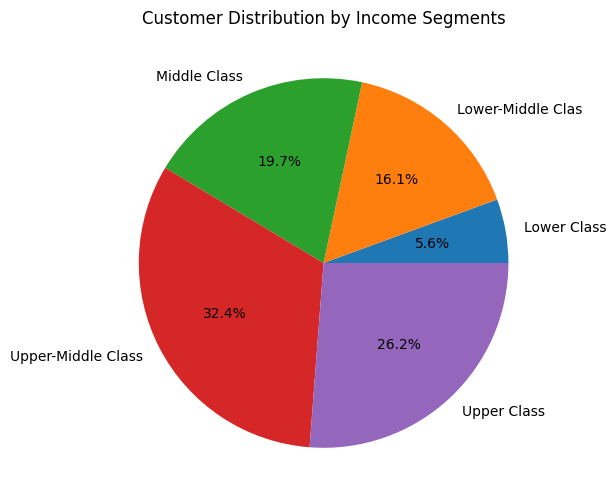

In [22]:
income_segmentation = {
    'Lower Class': len(lc),
    'Lower-Middle Clas': len(lmc),
    'Middle Class': len(mc),
    'Upper-Middle Class': len(umc),
    'Upper Class': len(uc)
}

#Pie Chart
plt.figure(figsize=(10,6))
plt.pie(income_segmentation.values(),labels=income_segmentation.keys(),autopct='%1.1f%%')
plt.title('Customer Distribution by Income Segments')
plt.show


